In [13]:
import pandas as pd

# Load the data
df = pd.read_csv('analysisdataset.csv')

# Select relevant columns
df = df[['Country Name', 'Theme_Combined', 'HDI', 'Annual_Capita_CO2_Consumption', 'GDP_capita']]

# Drop rows with missing values
df.dropna(subset=['HDI', 'Annual_Capita_CO2_Consumption', 'GDP_capita'], inplace=True)

# Filter for speeches with the 'S_int' theme
df['Strong_International'] = df['Theme_Combined'].apply(lambda x: 1 if 'S_int' in x else 0)

# Display the first few rows to verify
print(df.head())


          Country Name Theme_Combined    HDI  Annual_Capita_CO2_Consumption  \
0             Barbados             AG  0.809                       5.919121   
1           Micronesia             AG  0.634                       1.287989   
3              Bolivia             AG  0.698                       1.938643   
4             Suriname             AG  0.690                       4.390763   
6  Antigua and Barbuda             AG  0.826                       6.400294   

     GDP_capita  Strong_International  
0  18271.252253                     0  
1   3623.329337                     0  
3   3471.006951                     0  
4   6690.044786                     0  
6  17178.543716                     0  


In [14]:
# Descriptive statistics
desc_stats = df.groupby('Strong_International')[['HDI', 'Annual_Capita_CO2_Consumption', 'GDP_capita']].describe()
print(desc_stats)


                        HDI                                                    \
                      count      mean       std    min      25%    50%    75%   
Strong_International                                                            
0                     423.0  0.723522  0.149677  0.380  0.61000  0.739  0.827   
1                      44.0  0.832568  0.139347  0.481  0.75875  0.886  0.942   

                            Annual_Capita_CO2_Consumption            ...  \
                        max                         count      mean  ...   
Strong_International                                                 ...   
0                     0.967                         423.0  4.326056  ...   
1                     0.966                          44.0  7.420574  ...   

                                          GDP_capita                \
                           75%        max      count          mean   
Strong_International                                                 
0  

In [15]:
from scipy.stats import ttest_ind

# Separate the groups
s_int_group = df[df['Strong_International'] == 1]
non_s_int_group = df[df['Strong_International'] == 0]

# Perform t-tests
hdi_ttest = ttest_ind(s_int_group['HDI'], non_s_int_group['HDI'])
co2_ttest = ttest_ind(s_int_group['Annual_Capita_CO2_Consumption'], non_s_int_group['Annual_Capita_CO2_Consumption'])
gdp_ttest = ttest_ind(s_int_group['GDP_capita'], non_s_int_group['GDP_capita'])

print('T-test for HDI:', hdi_ttest)
print('T-test for CO2 Emissions:', co2_ttest)
print('T-test for GDP per Capita:', gdp_ttest)


T-test for HDI: TtestResult(statistic=4.627912372828861, pvalue=4.797303314137355e-06, df=465.0)
T-test for CO2 Emissions: TtestResult(statistic=3.5471611970240304, pvalue=0.00042891609363677016, df=465.0)
T-test for GDP per Capita: TtestResult(statistic=5.395934891277925, pvalue=1.0880089965637885e-07, df=465.0)


In [16]:
import statsmodels.api as sm

# Define the independent variable and add a constant
X = df[['Strong_International']]
X = sm.add_constant(X)

# HDI as the dependent variable
y_hdi = df['HDI']
model_hdi = sm.OLS(y_hdi, X).fit()
print(model_hdi.summary())

# CO2 emissions per capita as the dependent variable
y_co2 = df['Annual_Capita_CO2_Consumption']
model_co2 = sm.OLS(y_co2, X).fit()
print(model_co2.summary())

# GDP per capita as the dependent variable
y_gdp = df['GDP_capita']
model_gdp = sm.OLS(y_gdp, X).fit()
print(model_gdp.summary())


                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     21.42
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           4.80e-06
Time:                        17:06:10   Log-Likelihood:                 228.22
No. Observations:                 467   AIC:                            -452.4
Df Residuals:                     465   BIC:                            -444.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7235 

### Analysis and Interpretation of Results

Based on the provided t-test results and OLS regression results, we can interpret the findings regarding the relationship between the strong international theme (`S_int`) and the dependent variables (HDI, Annual CO2 emissions per capita, and GDP per capita).

#### T-Test Results

- **HDI**:
  - **Statistic**: 4.6279
  - **p-value**: 4.7973e-06

- **Annual CO2 Emissions per Capita**:
  - **Statistic**: 3.5472
  - **p-value**: 0.0004289

- **GDP per Capita**:
  - **Statistic**: 5.3959
  - **p-value**: 1.0880e-07

All p-values are less than 0.05, indicating that there are significant differences in HDI, CO2 emissions per capita, and GDP per capita between speeches with and without the strong international theme (`S_int`).

#### OLS Regression Results

- **HDI**:
  - **R-squared**: 0.044
  - **Coefficient (Strong_International)**: 0.1090 (p < 0.05)
  
- **Annual CO2 Emissions per Capita**:
  - **R-squared**: 0.026
  - **Coefficient (Strong_International)**: 3.0945 (p < 0.05)

- **GDP per Capita**:
  - **R-squared**: 0.059
  - **Coefficient (Strong_International)**: 23430.0 (p < 0.05)

### Interpretation

- **HDI**: The coefficient for the strong international theme (`S_int`) is positive and significant, suggesting that speeches with the strong international theme are associated with higher HDI. The t-test also supports this finding with a significant difference in HDI between the two groups.
  
- **Annual CO2 Emissions per Capita**: The positive and significant coefficient for the strong international theme (`S_int`) indicates that speeches with this theme are associated with higher CO2 emissions per capita. The t-test confirms this significant difference.

- **GDP per Capita**: The strong international theme (`S_int`) is significantly associated with higher GDP per capita, as indicated by the positive coefficient in the regression model and supported by the t-test results.

These plots will visually confirm the statistical analysis, showing higher values of HDI, CO2 emissions per capita, and GDP per capita for speeches with the strong international theme (`S_int`).

### Conclusion

The hypothesis that the strong international theme is associated with higher HDI, CO2 emissions per capita, and GDP per capita is supported by the t-test and regression analyses. Speeches emphasizing strong international themes tend to be from countries with higher levels of human development, economic output, and environmental impact.

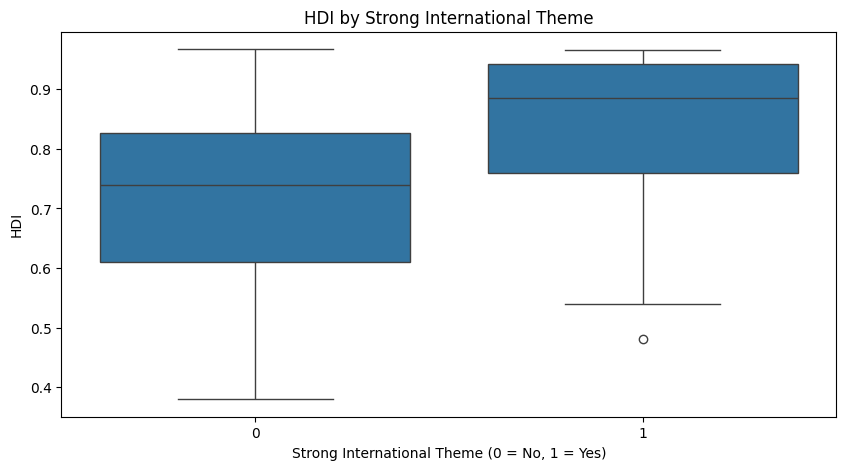

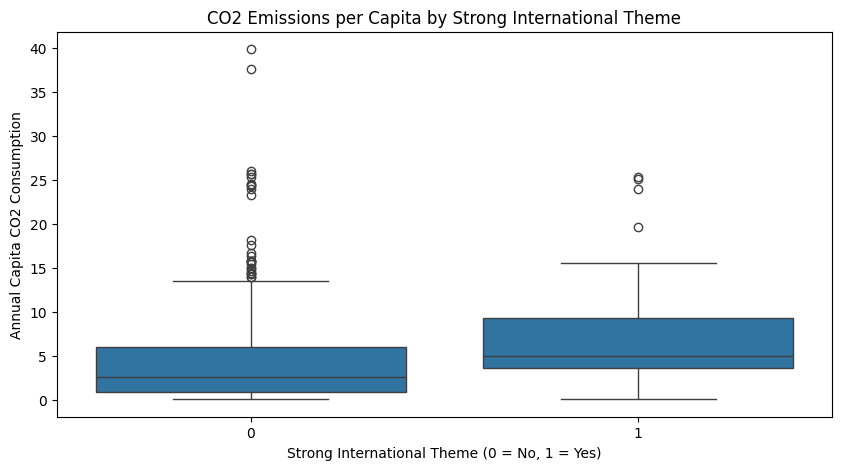

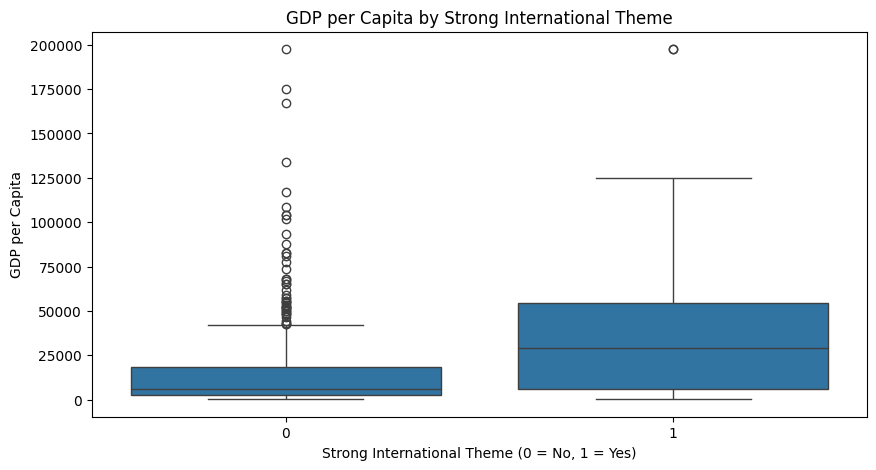

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for HDI
plt.figure(figsize=(10, 5))
sns.boxplot(x='Strong_International', y='HDI', data=df)
plt.title('HDI by Strong International Theme')
plt.xlabel('Strong International Theme (0 = No, 1 = Yes)')
plt.ylabel('HDI')
plt.show()

# Box plot for CO2 emissions per capita
plt.figure(figsize=(10, 5))
sns.boxplot(x='Strong_International', y='Annual_Capita_CO2_Consumption', data=df)
plt.title('CO2 Emissions per Capita by Strong International Theme')
plt.xlabel('Strong International Theme (0 = No, 1 = Yes)')
plt.ylabel('Annual Capita CO2 Consumption')
plt.show()

# Box plot for GDP per capita
plt.figure(figsize=(10, 5))
sns.boxplot(x='Strong_International', y='GDP_capita', data=df)
plt.title('GDP per Capita by Strong International Theme')
plt.xlabel('Strong International Theme (0 = No, 1 = Yes)')
plt.ylabel('GDP per Capita')
plt.show()


In [18]:
import pandas as pd

# Load the data
df = pd.read_csv('analysisdataset.csv')

# Select relevant columns
df = df[['Country Name', 'Theme_Combined', 'HDI', 'Annual_Capita_CO2_Consumption', 'GDP_capita']]

# Drop rows with missing values
df.dropna(subset=['HDI', 'Annual_Capita_CO2_Consumption', 'GDP_capita'], inplace=True)

# Split Theme_Combined into individual themes
themes = ['S_int', 'S_reg', 'S_dom', 'W_int', 'W_reg', 'W_dom', 'AG', 'NG']
for theme in themes:
    df[theme] = df['Theme_Combined'].apply(lambda x: 1 if theme in x.split() else 0)

# Display the first few rows to verify
print(df.head())


          Country Name Theme_Combined    HDI  Annual_Capita_CO2_Consumption  \
0             Barbados             AG  0.809                       5.919121   
1           Micronesia             AG  0.634                       1.287989   
3              Bolivia             AG  0.698                       1.938643   
4             Suriname             AG  0.690                       4.390763   
6  Antigua and Barbuda             AG  0.826                       6.400294   

     GDP_capita  S_int  S_reg  S_dom  W_int  W_reg  W_dom  AG  NG  
0  18271.252253      0      0      0      0      0      0   1   0  
1   3623.329337      0      0      0      0      0      0   1   0  
3   3471.006951      0      0      0      0      0      0   1   0  
4   6690.044786      0      0      0      0      0      0   1   0  
6  17178.543716      0      0      0      0      0      0   1   0  


In [19]:
from scipy.stats import ttest_ind

# Function to perform t-tests and display results
def perform_ttest_and_describe(df, theme, variable):
    group_1 = df[df[theme] == 1][variable]
    group_0 = df[df[theme] == 0][variable]
    
    ttest = ttest_ind(group_1, group_0)
    desc_stats = df.groupby(theme)[variable].describe()
    
    print(f'Descriptive statistics for {variable} by {theme}:')
    print(desc_stats)
    print(f'\nT-test for {variable} by {theme}:')
    print(ttest)
    print('\n')

# Perform t-tests and display descriptive statistics for each theme
for theme in themes:
    perform_ttest_and_describe(df, theme, 'HDI')
    perform_ttest_and_describe(df, theme, 'Annual_Capita_CO2_Consumption')
    perform_ttest_and_describe(df, theme, 'GDP_capita')


Descriptive statistics for HDI by S_int:
       count      mean       std    min      25%    50%    75%    max
S_int                                                                
0      423.0  0.723522  0.149677  0.380  0.61000  0.739  0.827  0.967
1       44.0  0.832568  0.139347  0.481  0.75875  0.886  0.942  0.966

T-test for HDI by S_int:
TtestResult(statistic=4.627912372828861, pvalue=4.797303314137355e-06, df=465.0)


Descriptive statistics for Annual_Capita_CO2_Consumption by S_int:
       count      mean       std       min       25%       50%       75%  \
S_int                                                                      
0      423.0  4.326056  5.395311  0.036762  0.896746  2.614921  5.993146   
1       44.0  7.420574  6.506157  0.041094  3.606909  4.953345  9.301170   

             max  
S_int             
0      39.884155  
1      25.333178  

T-test for Annual_Capita_CO2_Consumption by S_int:
TtestResult(statistic=3.5471611970240304, pvalue=0.0004289160936367701

In [20]:
import statsmodels.api as sm

# Function to perform regression analysis and display results
def perform_regression(df, theme, dependent_var):
    X = df[[theme]]
    X = sm.add_constant(X)
    y = df[dependent_var]
    
    model = sm.OLS(y, X).fit()
    print(f'Regression results for {dependent_var} by {theme}:')
    print(model.summary())
    print('\n')

# Perform regression analysis for each theme
for theme in themes:
    perform_regression(df, theme, 'HDI')
    perform_regression(df, theme, 'Annual_Capita_CO2_Consumption')
    perform_regression(df, theme, 'GDP_capita')


Regression results for HDI by S_int:
                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     21.42
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           4.80e-06
Time:                        17:06:10   Log-Likelihood:                 228.22
No. Observations:                 467   AIC:                            -452.4
Df Residuals:                     465   BIC:                            -444.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

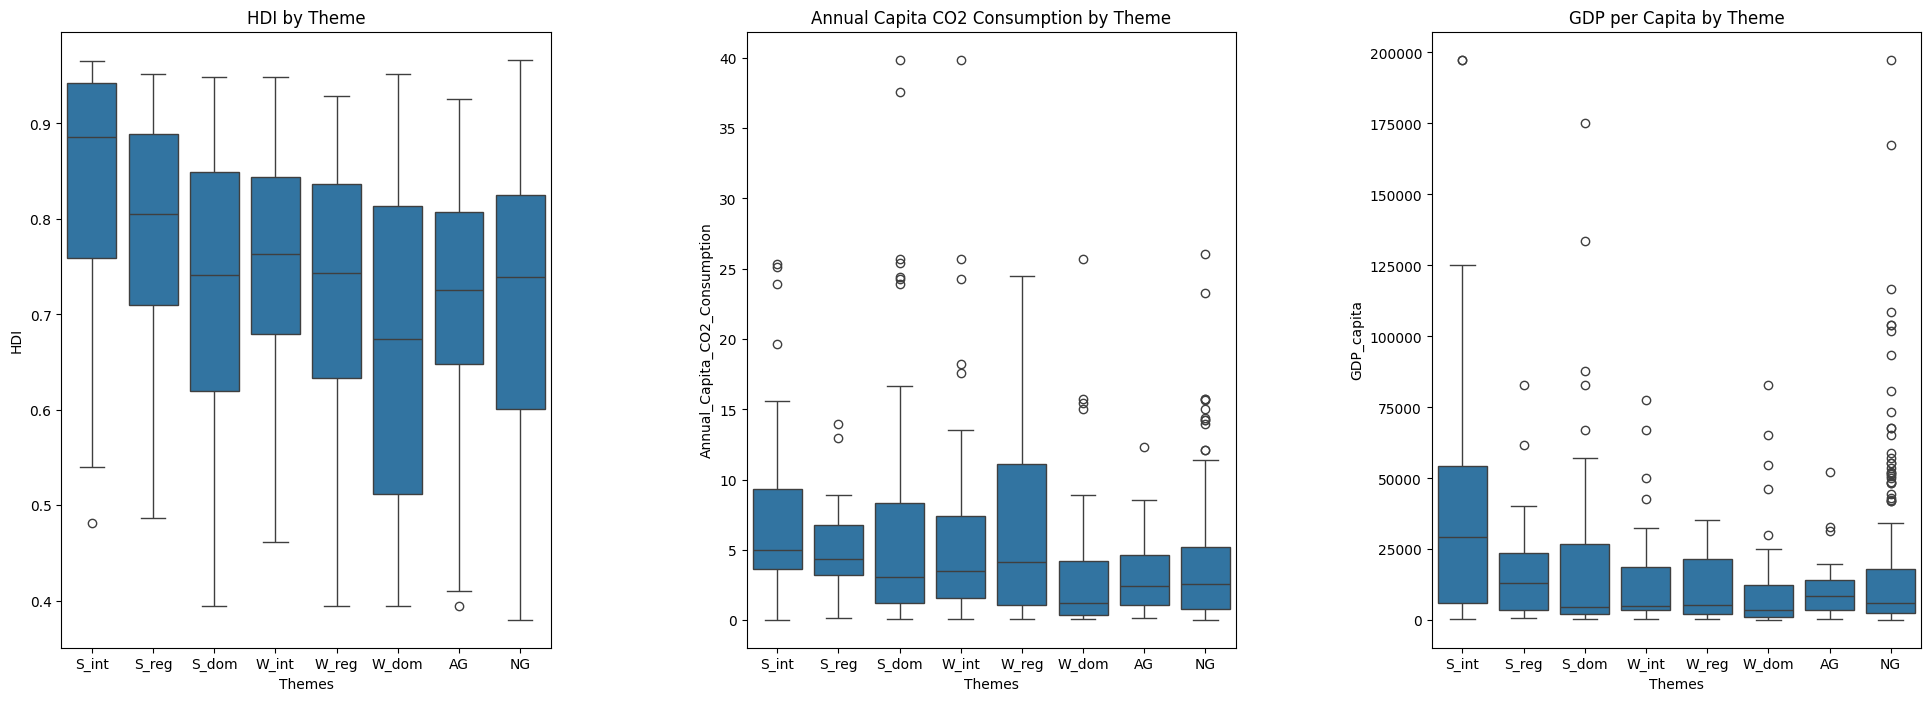

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the themes and dependent variables
themes = ['S_int', 'S_reg', 'S_dom', 'W_int', 'W_reg', 'W_dom', 'AG', 'NG']
dependent_vars = ['HDI', 'Annual_Capita_CO2_Consumption', 'GDP_capita']
titles = ['HDI by Theme', 'Annual Capita CO2 Consumption by Theme', 'GDP per Capita by Theme']

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
fig.subplots_adjust(wspace=0.4)

# Loop over the dependent variables to create the box plots
for i, dep_var in enumerate(dependent_vars):
    melted_df = df.melt(id_vars=themes, value_vars=[dep_var], var_name='Variable', value_name='Value')
    
    # Create a long format DataFrame for each theme
    theme_dfs = []
    for theme in themes:
        temp_df = melted_df[melted_df[theme] == 1][['Variable', 'Value']].copy()
        temp_df['Theme'] = theme
        theme_dfs.append(temp_df)
    
    combined_df = pd.concat(theme_dfs, ignore_index=True)
    
    # Create the boxplot
    sns.boxplot(data=combined_df, x='Theme', y='Value', ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Themes')
    axes[i].set_ylabel(dep_var)

plt.show()


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
   Green-Growth Critical               Non-Growth    0.003    1.0 -0.0695  0.0755  False
   Green-Growth Critical     Strong International   0.1145 0.0058   0.022  0.2069   True
   Green-Growth Critical Strong Regional/Domestic   0.0218 0.9755 -0.0614   0.105  False
   Green-Growth Critical       Weak International   0.0339 0.8762 -0.0533  0.1212  False
   Green-Growth Critical   Weak Regional/Domestic  -0.0297 0.9214 -0.1155  0.0561  False
              Non-Growth     Strong International   0.1115 0.0001  0.0418  0.1811   True
              Non-Growth Strong Regional/Domestic   0.0188 0.9343 -0.0381  0.0757  False
              Non-Growth       Weak International   0.0309 0.7194 -0.0317  0.0936  False
              Non-Gro

<Figure size 1200x800 with 0 Axes>

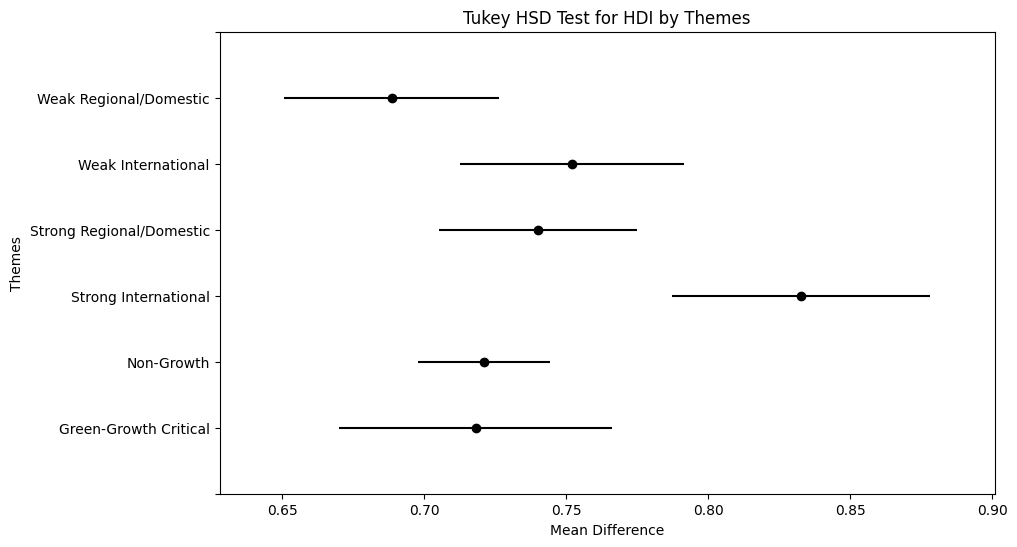

Significant pairwise comparisons for HDI:
['Green-Growth Critical', 'Non-Growth', 0.003, 1.0, -0.0695, 0.0755, False]
['Green-Growth Critical', 'Strong Regional/Domestic', 0.0218, 0.9755, -0.0614, 0.105, False]
['Green-Growth Critical', 'Weak International', 0.0339, 0.8762, -0.0533, 0.1212, False]
['Green-Growth Critical', 'Weak Regional/Domestic', -0.0297, 0.9214, -0.1155, 0.0561, False]
['Non-Growth', 'Strong Regional/Domestic', 0.0188, 0.9343, -0.0381, 0.0757, False]
['Non-Growth', 'Weak International', 0.0309, 0.7194, -0.0317, 0.0936, False]
['Non-Growth', 'Weak Regional/Domestic', -0.0327, 0.6373, -0.0933, 0.0279, False]
['Strong International', 'Weak International', -0.0805, 0.0744, -0.1654, 0.0044, False]
['Strong Regional/Domestic', 'Weak International', 0.0121, 0.9973, -0.0627, 0.0869, False]
['Strong Regional/Domestic', 'Weak Regional/Domestic', -0.0515, 0.3351, -0.1245, 0.0216, False]
['Weak International', 'Weak Regional/Domestic', -0.0636, 0.1788, -0.1412, 0.014, False]


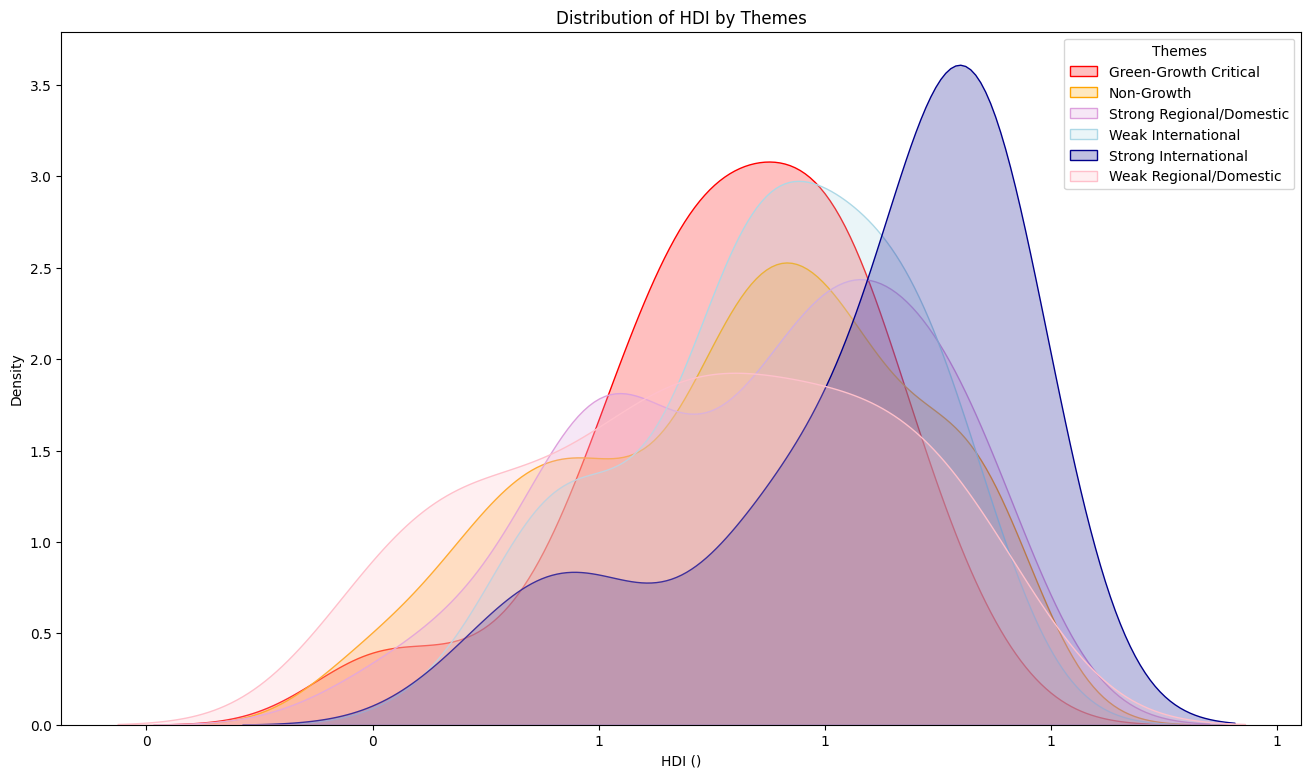

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                   group2          meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
   Green-Growth Critical               Non-Growth   0.5991 0.9902 -2.2047 3.4028  False
   Green-Growth Critical     Strong International   4.1966 0.0103  0.6401 7.7531   True
   Green-Growth Critical Strong Regional/Domestic    3.277 0.0433  0.0575 6.4966   True
   Green-Growth Critical       Weak International   2.6633 0.2139 -0.7125  6.039  False
   Green-Growth Critical   Weak Regional/Domestic   1.2668  0.886  -2.063 4.5966  False
              Non-Growth     Strong International   3.5975 0.0018  0.9297 6.2653   True
              Non-Growth Strong Regional/Domestic    2.678 0.0071  0.4794 4.8766   True
              Non-Growth       Weak International   2.0642 0.1451 -0.3573 4.4857  False
              Non-Growth   Weak 

<Figure size 1200x800 with 0 Axes>

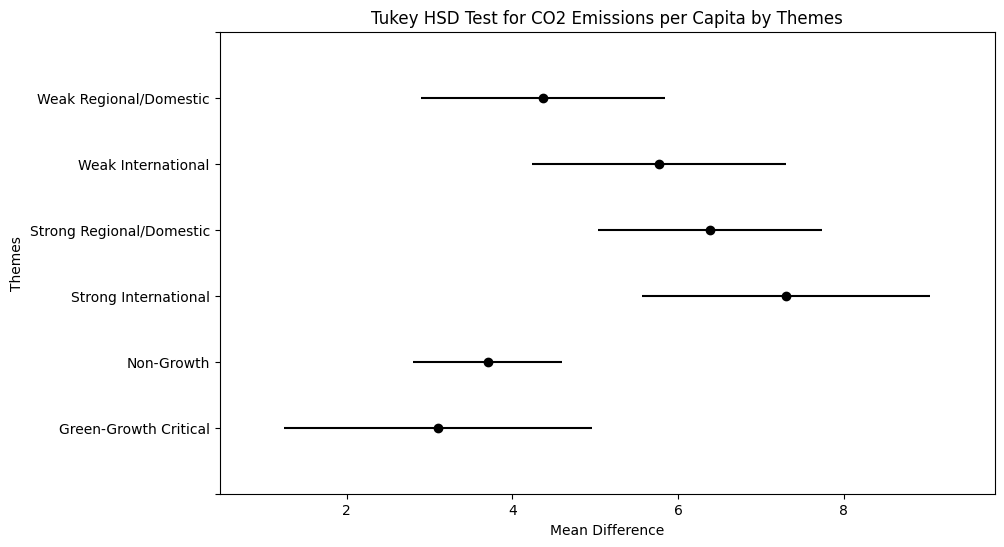

Significant pairwise comparisons for CO2 Emissions per Capita:
['Green-Growth Critical', 'Non-Growth', 0.5991, 0.9902, -2.2047, 3.4028, False]
['Green-Growth Critical', 'Weak International', 2.6633, 0.2139, -0.7125, 6.039, False]
['Green-Growth Critical', 'Weak Regional/Domestic', 1.2668, 0.886, -2.063, 4.5966, False]
['Non-Growth', 'Weak International', 2.0642, 0.1451, -0.3573, 4.4857, False]
['Non-Growth', 'Weak Regional/Domestic', 0.6677, 0.9656, -1.6893, 3.0247, False]
['Strong International', 'Strong Regional/Domestic', -0.9196, 0.9582, -4.0214, 2.1823, False]
['Strong International', 'Weak International', -1.5333, 0.7602, -4.797, 1.7304, False]
['Strong International', 'Weak Regional/Domestic', -2.9298, 0.0976, -6.1459, 0.2863, False]
['Strong Regional/Domestic', 'Weak International', -0.6137, 0.9905, -3.5066, 2.2791, False]
['Strong Regional/Domestic', 'Weak Regional/Domestic', -2.0102, 0.3292, -4.8493, 0.8288, False]
['Weak International', 'Weak Regional/Domestic', -1.3965, 0.7

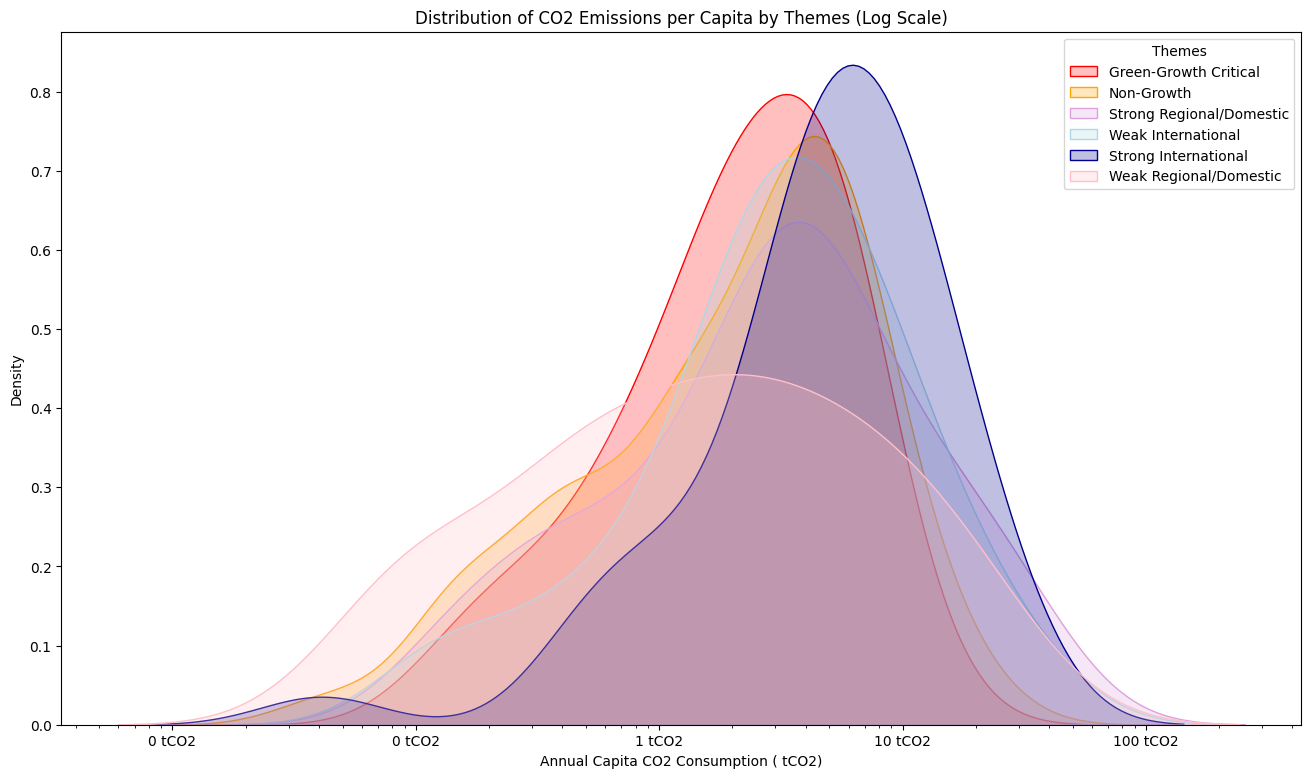

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
         group1                   group2            meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------------------------------------------
   Green-Growth Critical               Non-Growth   6771.2818 0.8395  -9446.6319 22989.1954  False
   Green-Growth Critical     Strong International  26381.8665 0.0033   5977.4447 46786.2884   True
   Green-Growth Critical Strong Regional/Domestic   7836.7974 0.8319 -10689.6251 26363.2199  False
   Green-Growth Critical       Weak International    509.5493    1.0 -18886.6161 19905.7147  False
   Green-Growth Critical   Weak Regional/Domestic   3119.5758 0.9972 -15903.5516 22142.7032  False
              Non-Growth     Strong International  19610.5848 0.0031   4513.9734 34707.1961   True
              Non-Growth Strong Regional/Domestic   1065.5156 0.9999 -11376.1713 13507.2025  False
          

<Figure size 1200x800 with 0 Axes>

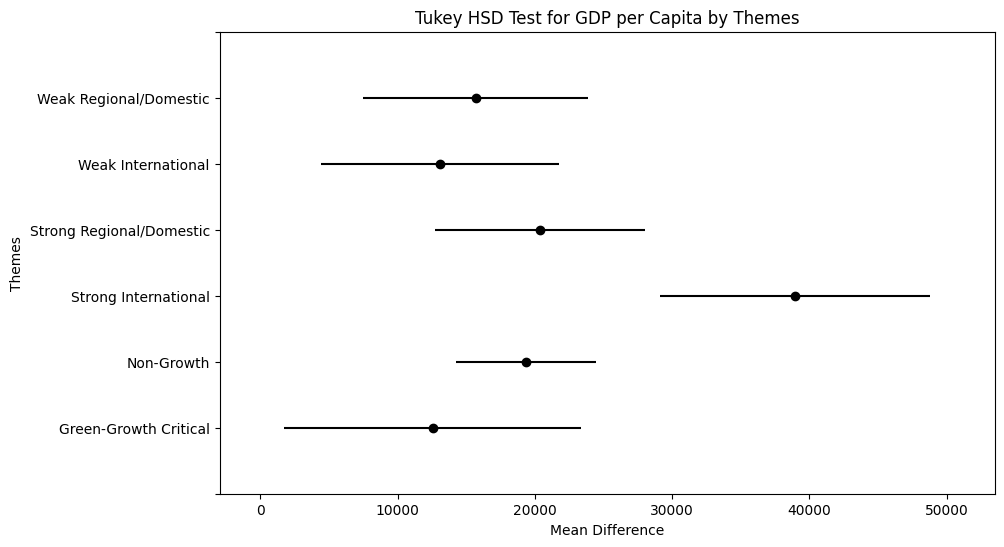

Significant pairwise comparisons for GDP per Capita:
['Green-Growth Critical', 'Non-Growth', 6771.2818, 0.8395, -9446.6319, 22989.1954, False]
['Green-Growth Critical', 'Strong Regional/Domestic', 7836.7974, 0.8319, -10689.6251, 26363.2199, False]
['Green-Growth Critical', 'Weak International', 509.5493, 1.0, -18886.6161, 19905.7147, False]
['Green-Growth Critical', 'Weak Regional/Domestic', 3119.5758, 0.9972, -15903.5516, 22142.7032, False]
['Non-Growth', 'Strong Regional/Domestic', 1065.5156, 0.9999, -11376.1713, 13507.2025, False]
['Non-Growth', 'Weak International', -6261.7325, 0.781, -19964.9611, 7441.4962, False]
['Non-Growth', 'Weak Regional/Domestic', -3651.7059, 0.9686, -16821.6194, 9518.2075, False]
['Strong Regional/Domestic', 'Weak International', -7327.2481, 0.7957, -23697.5286, 9043.0324, False]
['Strong Regional/Domestic', 'Weak Regional/Domestic', -4717.2215, 0.9584, -20643.7474, 11209.3043, False]
['Weak International', 'Weak Regional/Domestic', 2610.0265, 0.9979, -143

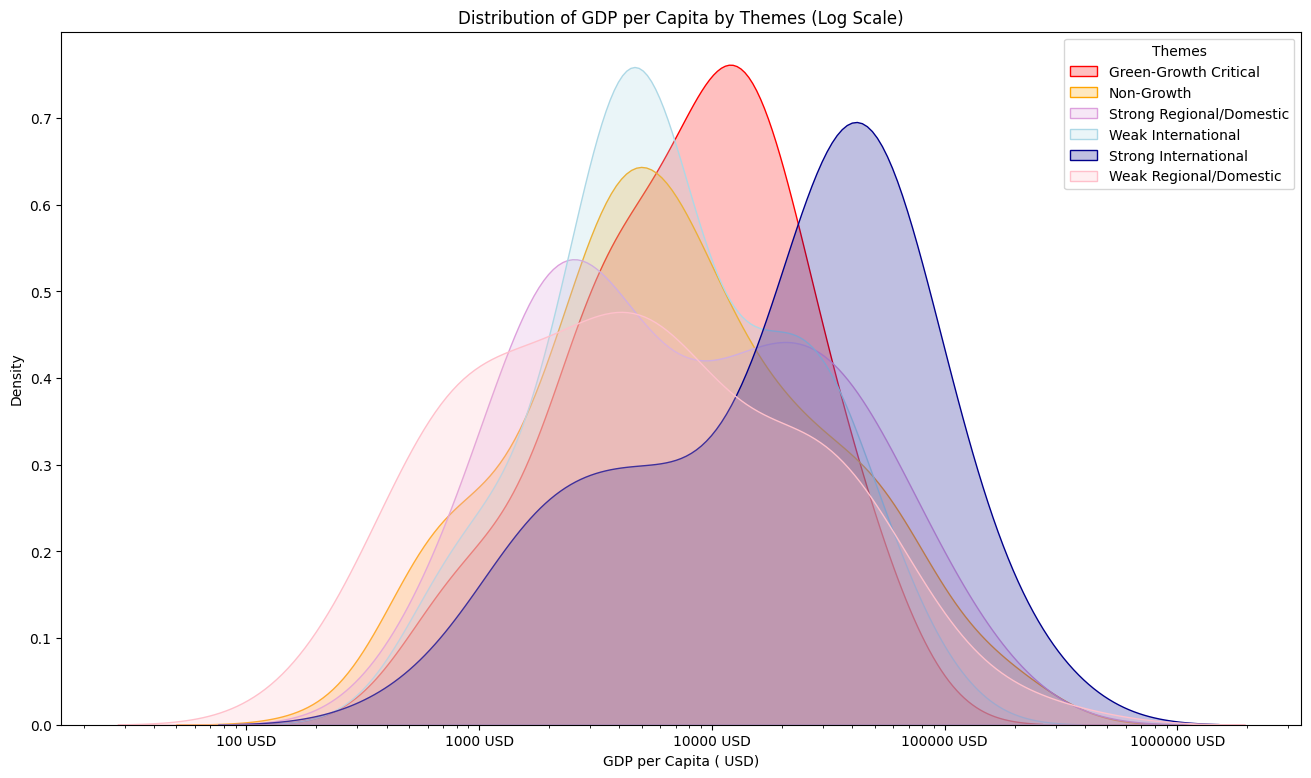

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.ticker import FuncFormatter

# Load your data
data = pd.read_csv('analysisdataset.csv')

# Replace spaces in column names with underscores
data.columns = data.columns.str.replace(' ', '_')

# Split combined themes into individual themes
data['Themes'] = data['Theme_Combined'].str.split()

# Explode the list of themes into separate rows
data_expanded = data.explode('Themes').reset_index(drop=True)

# Define new theme groups and colors
theme_labels = {
    'S_int': 'Strong International', 
    'S_reg': 'Strong Regional/Domestic', 
    'S_dom': 'Strong Regional/Domestic',
    'W_int': 'Weak International', 
    'W_reg': 'Weak Regional/Domestic', 
    'W_dom': 'Weak Regional/Domestic', 
    'AG': 'Green-Growth Critical', 
    'NG': 'Non-Growth'
}
theme_colors = {
    'Strong International': 'darkblue', 
    'Strong Regional/Domestic': 'plum',
    'Weak International': 'lightblue', 
    'Weak Regional/Domestic': 'pink', 
    'Green-Growth Critical': 'red', 
    'Non-Growth': 'orange'
}

# Map the themes to their new group names
data_expanded['Themes'] = data_expanded['Themes'].map(theme_labels)

# Function to format the axis to show actual values with units
def log_format(x, pos, unit=''):
    return '{:.0f}{}'.format(x, unit)

# Function to perform Tukey's HSD test and plot results
def perform_tukey_and_plot(data, value_column, title, xlabel, unit, log_scale=False):
    tukey_result = pairwise_tukeyhsd(endog=data[value_column], groups=data['Themes'], alpha=0.05)
    print(tukey_result.summary())

    # Plot the results of Tukey's HSD test
    plt.figure(figsize=(12, 8))
    tukey_result.plot_simultaneous()
    plt.title(f'Tukey HSD Test for {title} by Themes')
    plt.xlabel('Mean Difference')
    plt.ylabel('Themes')
    plt.show()

    # Highlight significant results in the summary
    significant_results = tukey_result.summary().data[1:]
    significant_pairs = [result for result in significant_results if result[-1] < 0.05]
    print(f"Significant pairwise comparisons for {title}:")
    for pair in significant_pairs:
        print(pair)

    # Plot density plot
    plt.figure(figsize=(16, 9))
    themes = data['Themes'].unique()
    for theme in themes:
        subset = data[data['Themes'] == theme]
        sns.kdeplot(subset[value_column], label=theme, fill=True, color=theme_colors[theme], log_scale=log_scale)
    
    # Customize the plot
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: log_format(x, pos, unit)))
    plt.title(f'Distribution of {title} by Themes' + (' (Log Scale)' if log_scale else ''))
    plt.xlabel(f'{xlabel} ({unit})')
    plt.ylabel('Density')
    plt.legend(title='Themes')
    plt.show()

# Perform Tukey's HSD test and plot for HDI
data_hdi = data_expanded.dropna(subset=['HDI'])
perform_tukey_and_plot(data_hdi, 'HDI', 'HDI', 'HDI', '')

# Perform Tukey's HSD test and plot for CO2 emissions per capita (log scale)
data_co2 = data_expanded.dropna(subset=['Annual_Capita_CO2_Consumption'])
perform_tukey_and_plot(data_co2, 'Annual_Capita_CO2_Consumption', 'CO2 Emissions per Capita', 'Annual Capita CO2 Consumption', ' tCO2', log_scale=True)

# Perform Tukey's HSD test and plot for GDP per capita (log scale)
data_gdp = data_expanded.dropna(subset=['GDP_capita'])
perform_tukey_and_plot(data_gdp, 'GDP_capita', 'GDP per Capita', 'GDP per Capita', ' USD', log_scale=True)


Tukey HSD Test for HDI by Themes
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
   Green-Growth Critical               Non-Growth    0.003    1.0 -0.0695  0.0755  False
   Green-Growth Critical     Strong International   0.1145 0.0058   0.022  0.2069   True
   Green-Growth Critical Strong Regional/Domestic   0.0218 0.9755 -0.0614   0.105  False
   Green-Growth Critical       Weak International   0.0339 0.8762 -0.0533  0.1212  False
   Green-Growth Critical   Weak Regional/Domestic  -0.0297 0.9214 -0.1155  0.0561  False
              Non-Growth     Strong International   0.1115 0.0001  0.0418  0.1811   True
              Non-Growth Strong Regional/Domestic   0.0188 0.9343 -0.0381  0.0757  False
              Non-Growth       Weak International   0.0309 0.7194 -0.0317  0.

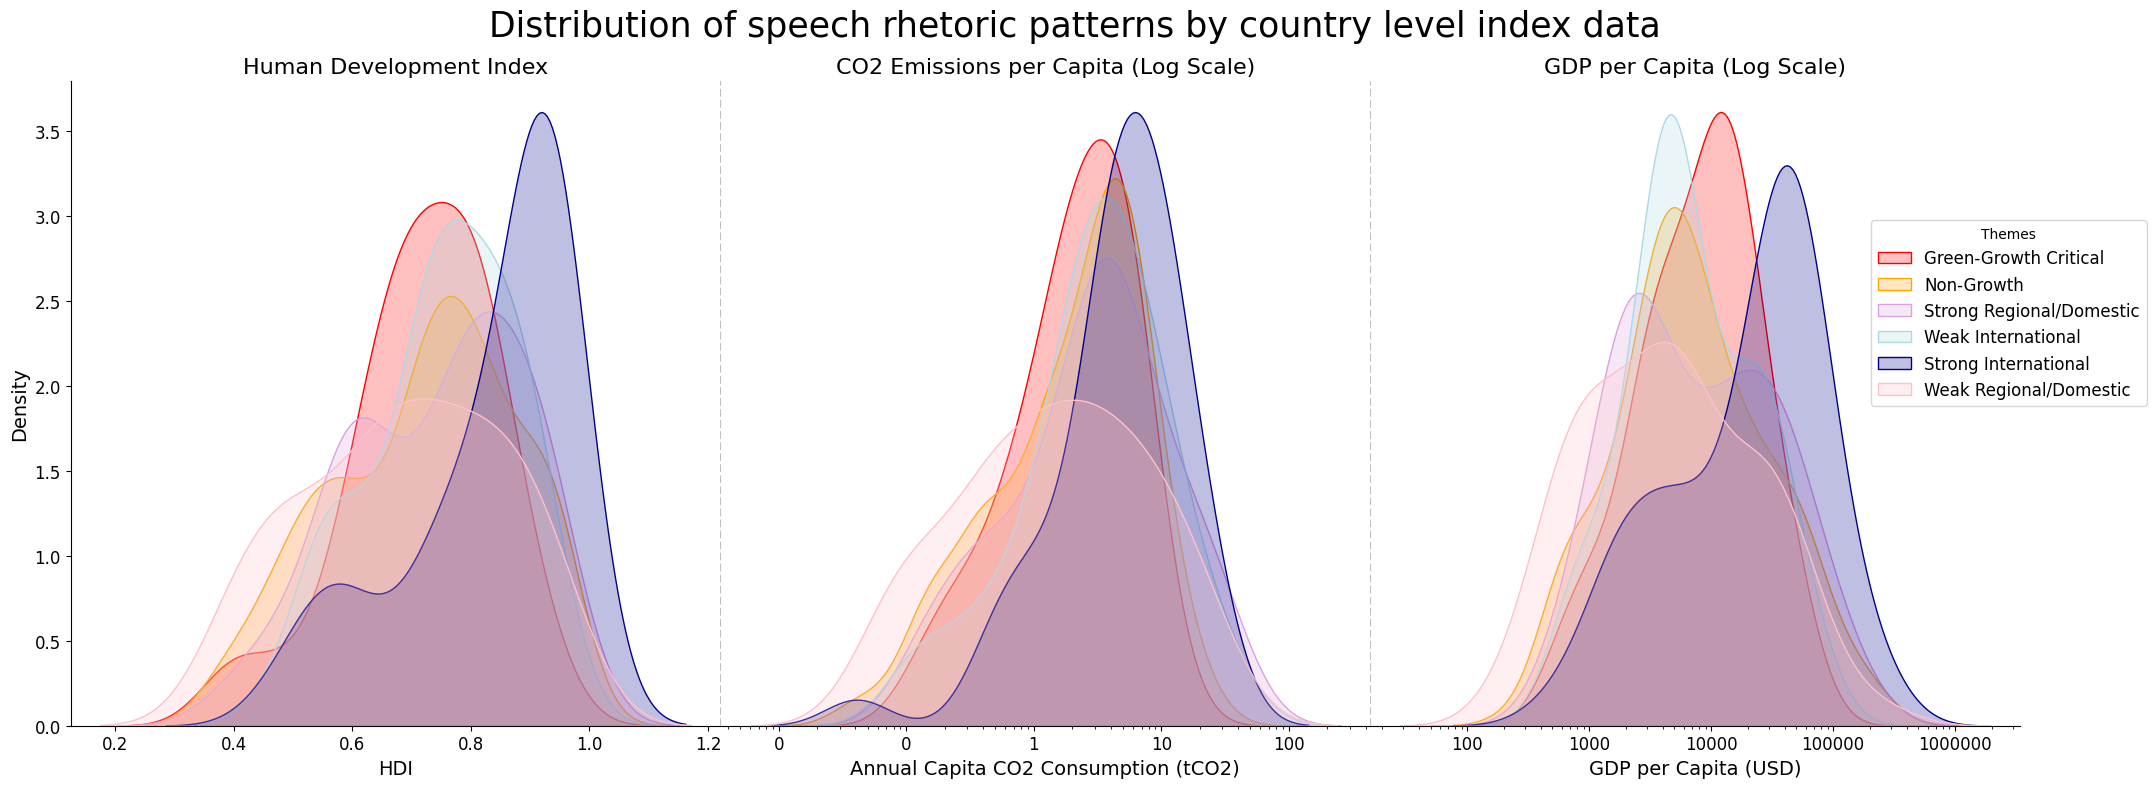

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.ticker import FuncFormatter

# Load your data
data = pd.read_csv('analysisdataset.csv')

# Replace spaces in column names with underscores
data.columns = data.columns.str.replace(' ', '_')

# Split combined themes into individual themes
data['Themes'] = data['Theme_Combined'].str.split()

# Explode the list of themes into separate rows
data_expanded = data.explode('Themes').reset_index(drop=True)

# Define new theme groups and colors
theme_labels = {
    'S_int': 'Strong International', 
    'S_reg': 'Strong Regional/Domestic', 
    'S_dom': 'Strong Regional/Domestic',
    'W_int': 'Weak International', 
    'W_reg': 'Weak Regional/Domestic', 
    'W_dom': 'Weak Regional/Domestic', 
    'AG': 'Green-Growth Critical', 
    'NG': 'Non-Growth'
}
theme_colors = {
    'Strong International': 'darkblue', 
    'Strong Regional/Domestic': 'plum',
    'Weak International': 'lightblue', 
    'Weak Regional/Domestic': 'pink', 
    'Green-Growth Critical': 'red', 
    'Non-Growth': 'orange'
}

# Map the themes to their new group names
data_expanded['Themes'] = data_expanded['Themes'].map(theme_labels)

# Function to format the axis to show actual values with units
# Function to format the axis to show actual values without units
def log_format(x, pos):
    return '{:.0f}'.format(x)

# Function to perform Tukey's HSD test and print results
def perform_tukey(data, value_column, title):
    tukey_result = pairwise_tukeyhsd(endog=data[value_column], groups=data['Themes'], alpha=0.05)
    print(f'Tukey HSD Test for {title} by Themes')
    print(tukey_result.summary())
    return tukey_result

# Function to plot density plots side by side
def plot_density_plots(data_hdi, data_co2, data_gdp):
    fig, axes = plt.subplots(1, 3, figsize=(24, 8), gridspec_kw={'wspace': 0})

    fig.suptitle('Distribution of speech rhetoric patterns by country level index data', fontsize=25, x=0.45)

    
    # Plot HDI density plot
    for theme in data_hdi['Themes'].unique():
        subset = data_hdi[data_hdi['Themes'] == theme]
        sns.kdeplot(subset['HDI'], label=theme, fill=True, color=theme_colors[theme], ax=axes[0])
    axes[0].set_title('Human Development Index', fontsize=16)
    axes[0].set_xlabel('HDI', fontsize=14)
    axes[0].set_ylabel('Density', fontsize=14)
    axes[0].tick_params(axis='both', which='major', labelsize=12)
    
    # Plot CO2 emissions per capita density plot (log scale)
    for theme in data_co2['Themes'].unique():
        subset = data_co2[data_co2['Themes'] == theme]
        sns.kdeplot(subset['Annual_Capita_CO2_Consumption'], label=theme, fill=True, color=theme_colors[theme], log_scale=True, ax=axes[1])
    axes[1].xaxis.set_major_formatter(FuncFormatter(log_format))
    axes[1].set_title('CO2 Emissions per Capita (Log Scale)', fontsize=16)
    axes[1].set_xlabel('Annual Capita CO2 Consumption (tCO2)', fontsize=14)
    axes[1].set_ylabel('')
    axes[1].tick_params(axis='both', which='major', labelsize=12)
    axes[1].tick_params(axis='y', left=False, labelleft=False)
    axes[1].axvline(x=axes[1].get_xlim()[0], color='grey', linestyle='--', alpha=0.5)

    
    # Plot GDP per capita density plot (log scale)
    for theme in data_gdp['Themes'].unique():
        subset = data_gdp[data_gdp['Themes'] == theme]
        sns.kdeplot(subset['GDP_capita'], label=theme, fill=True, color=theme_colors[theme], log_scale=True, ax=axes[2])
    axes[2].xaxis.set_major_formatter(FuncFormatter(log_format))
    axes[2].set_title('GDP per Capita (Log Scale)', fontsize=16)
    axes[2].set_xlabel('GDP per Capita (USD)', fontsize=14)
    axes[2].set_ylabel('')
    axes[2].tick_params(axis='both', which='major', labelsize=12)
    axes[2].tick_params(axis='y', left=False, labelleft=False)
    axes[2].axvline(x=axes[2].get_xlim()[0], color='grey', linestyle='--', alpha=0.5)
    
    # Remove all spines except bottom and leftmost ones
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
    axes[0].spines['left'].set_visible(True)
    
    # Combine legends from all plots into one
    handles, labels = axes[2].get_legend_handles_labels()
    fig.legend(handles, labels, title='Themes', loc='center right', fontsize='large', bbox_to_anchor=(0.9, 0.6))
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust rect parameter to provide space for the legend on the right
    plt.show()

# Filter data for each measurement
data_hdi = data_expanded.dropna(subset=['HDI'])
data_co2 = data_expanded.dropna(subset=['Annual_Capita_CO2_Consumption'])
data_gdp = data_expanded.dropna(subset=['GDP_capita'])

# Perform Tukey's HSD tests
tukey_hdi = perform_tukey(data_hdi, 'HDI', 'HDI')
tukey_co2 = perform_tukey(data_co2, 'Annual_Capita_CO2_Consumption', 'CO2 Emissions per Capita')
tukey_gdp = perform_tukey(data_gdp, 'GDP_capita', 'GDP per Capita')

# Plot density plots side by side with a single legend
plot_density_plots(data_hdi, data_co2, data_gdp)


# testing for no effect

## normal distribution

In [64]:
import pandas as pd
import scipy.stats as stats

# Load your data
data = pd.read_csv('analysisdataset.csv')

# Replace spaces in column names with underscores
data.columns = data.columns.str.replace(' ', '_')

# Split combined themes into individual themes
data['Themes'] = data['Theme_Combined'].str.split()

# Explode the list of themes into separate rows
data_expanded = data.explode('Themes').reset_index(drop=True)

# Define new theme groups and colors
theme_labels = {
    'S_int': 'Strong International', 
    'S_reg': 'Strong Regional/Domestic', 
    'S_dom': 'Strong Regional/Domestic',
    'W_int': 'Weak International', 
    'W_reg': 'Weak Regional/Domestic', 
    'W_dom': 'Weak Regional/Domestic', 
    'AG': 'Green-Growth Critical', 
    'NG': 'Non-Growth'
}
theme_colors = {
    'Strong International': 'darkblue', 
    'Strong Regional/Domestic': 'plum',
    'Weak International': 'lightblue', 
    'Weak Regional/Domestic': 'pink', 
    'Green-Growth Critical': 'red', 
    'Non-Growth': 'orange'
}

# Map the themes to their new group names
data_expanded['Themes'] = data_expanded['Themes'].map(theme_labels)

# Function to perform Shapiro-Wilk test
def shapiro_test(data, value_column):
    themes = data['Themes'].unique()
    results = {}
    for theme in themes:
        subset = data[data['Themes'] == theme][value_column].dropna()
        stat, p = stats.shapiro(subset)
        results[theme] = p
    return results

# Perform Shapiro-Wilk test for HDI, CO2, and GDP
shapiro_hdi = shapiro_test(data_expanded, 'HDI')
shapiro_co2 = shapiro_test(data_expanded, 'Annual_Capita_CO2_Consumption')
shapiro_gdp = shapiro_test(data_expanded, 'GDP_capita')

# Print the results
print("Shapiro-Wilk Test for HDI by Themes:")
for theme, p in shapiro_hdi.items():
    print(f"{theme}: p-value = {p}")

print("\nShapiro-Wilk Test for CO2 Emissions per Capita by Themes:")
for theme, p in shapiro_co2.items():
    print(f"{theme}: p-value = {p}")

print("\nShapiro-Wilk Test for GDP per Capita by Themes:")
for theme, p in shapiro_gdp.items():
    print(f"{theme}: p-value = {p}")

# Function to interpret the results
def interpret_shapiro_results(results):
    normal_themes = [theme for theme, p in results.items() if p > 0.05]
    non_normal_themes = [theme for theme, p in results.items() if p <= 0.05]
    return normal_themes, non_normal_themes

# Interpret the results
normal_hdi, non_normal_hdi = interpret_shapiro_results(shapiro_hdi)
normal_co2, non_normal_co2 = interpret_shapiro_results(shapiro_co2)
normal_gdp, non_normal_gdp = interpret_shapiro_results(shapiro_gdp)

print("\nThemes following a normal distribution for HDI:", normal_hdi)
print("Themes not following a normal distribution for HDI:", non_normal_hdi)

print("\nThemes following a normal distribution for CO2 Emissions per Capita:", normal_co2)
print("Themes not following a normal distribution for CO2 Emissions per Capita:", non_normal_co2)

print("\nThemes following a normal distribution for GDP per Capita:", normal_gdp)
print("Themes not following a normal distribution for GDP per Capita:", non_normal_gdp)


Shapiro-Wilk Test for HDI by Themes:
Green-Growth Critical: p-value = 0.09463632810693011
Non-Growth: p-value = 9.377006019094689e-06
Strong Regional/Domestic: p-value = 0.00501409054446477
Weak International: p-value = 0.04922537476224223
Strong International: p-value = 6.7160958411723005e-06
Weak Regional/Domestic: p-value = 0.022876709022111794

Shapiro-Wilk Test for CO2 Emissions per Capita by Themes:
Green-Growth Critical: p-value = 0.0006694676518149783
Non-Growth: p-value = 9.110109898476392e-17
Strong Regional/Domestic: p-value = 6.138317213223527e-11
Weak International: p-value = 1.4746200443993973e-09
Strong International: p-value = 3.203887751242984e-05
Weak Regional/Domestic: p-value = 5.151761730102549e-10

Shapiro-Wilk Test for GDP per Capita by Themes:
Green-Growth Critical: p-value = 1.4834425165550031e-05
Non-Growth: p-value = 3.787937633361183e-24
Strong Regional/Domestic: p-value = 6.0355622004887586e-12
Weak International: p-value = 3.717317465614305e-09
Strong Inte

## same distribution as rest of dataset

In [65]:
import pandas as pd
import scipy.stats as stats

# Load your data
data = pd.read_csv('analysisdataset.csv')

# Replace spaces in column names with underscores
data.columns = data.columns.str.replace(' ', '_')

# Split combined themes into individual themes
data['Themes'] = data['Theme_Combined'].str.split()

# Explode the list of themes into separate rows
data_expanded = data.explode('Themes').reset_index(drop=True)

# Define new theme groups and colors
theme_labels = {
    'S_int': 'Strong International', 
    'S_reg': 'Strong Regional/Domestic', 
    'S_dom': 'Strong Regional/Domestic',
    'W_int': 'Weak International', 
    'W_reg': 'Weak Regional/Domestic', 
    'W_dom': 'Weak Regional/Domestic', 
    'AG': 'Green-Growth Critical', 
    'NG': 'Non-Growth'
}
theme_colors = {
    'Strong International': 'darkblue', 
    'Strong Regional/Domestic': 'plum',
    'Weak International': 'lightblue', 
    'Weak Regional/Domestic': 'pink', 
    'Green-Growth Critical': 'red', 
    'Non-Growth': 'orange'
}

# Map the themes to their new group names
data_expanded['Themes'] = data_expanded['Themes'].map(theme_labels)

# Function to perform K-S test
def ks_test(data, value_column):
    themes = data['Themes'].unique()
    results = {}
    for theme in themes:
        subset = data[data['Themes'] == theme][value_column].dropna()
        stat, p = stats.ks_2samp(subset, data[value_column].dropna())
        results[theme] = p
    return results

# Perform K-S test for HDI, CO2, and GDP
ks_hdi = ks_test(data_expanded, 'HDI')
ks_co2 = ks_test(data_expanded, 'Annual_Capita_CO2_Consumption')
ks_gdp = ks_test(data_expanded, 'GDP_capita')

# Print the results
print("K-S Test for HDI by Themes:")
for theme, p in ks_hdi.items():
    print(f"{theme}: p-value = {p}")

print("\nK-S Test for CO2 Emissions per Capita by Themes:")
for theme, p in ks_co2.items():
    print(f"{theme}: p-value = {p}")

print("\nK-S Test for GDP per Capita by Themes:")
for theme, p in ks_gdp.items():
    print(f"{theme}: p-value = {p}")

# Function to interpret the results
def interpret_ks_results(results):
    same_distribution_themes = [theme for theme, p in results.items() if p > 0.05]
    different_distribution_themes = [theme for theme, p in results.items() if p <= 0.05]
    return same_distribution_themes, different_distribution_themes

# Interpret the results
same_hdi, different_hdi = interpret_ks_results(ks_hdi)
same_co2, different_co2 = interpret_ks_results(ks_co2)
same_gdp, different_gdp = interpret_ks_results(ks_gdp)

print("\nThemes following the same distribution as the whole dataset for HDI:", same_hdi)
print("Themes not following the same distribution as the whole dataset for HDI:", different_hdi)

print("\nThemes following the same distribution as the whole dataset for CO2 Emissions per Capita:", same_co2)
print("Themes not following the same distribution as the whole dataset for CO2 Emissions per Capita:", different_co2)

print("\nThemes following the same distribution as the whole dataset for GDP per Capita:", same_gdp)
print("Themes not following the same distribution as the whole dataset for GDP per Capita:", different_gdp)


K-S Test for HDI by Themes:
Green-Growth Critical: p-value = 0.2390900233741169
Non-Growth: p-value = 0.7899586642595953
Strong Regional/Domestic: p-value = 0.9165915373832946
Weak International: p-value = 0.6573474555525284
Strong International: p-value = 7.459551579817563e-06
Weak Regional/Domestic: p-value = 0.08043114218670568

K-S Test for CO2 Emissions per Capita by Themes:
Green-Growth Critical: p-value = 0.34165940520377597
Non-Growth: p-value = 0.38119265164870375
Strong Regional/Domestic: p-value = 0.4353372376197837
Weak International: p-value = 0.4603385152774126
Strong International: p-value = 0.0007944561165891246
Weak Regional/Domestic: p-value = 0.05421957562356034

K-S Test for GDP per Capita by Themes:
Green-Growth Critical: p-value = 0.4224192205198932
Non-Growth: p-value = 0.8368563338236829
Strong Regional/Domestic: p-value = 0.5218525898325126
Weak International: p-value = 0.5991947222570508
Strong International: p-value = 2.375213513743427e-05
Weak Regional/Domes